In [1]:
import pandas as pd

df = pd.read_excel("lasvegastrip.xlsx", sheet_name = "Sheet1")

df.head()

,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,9,January,Thursday
1,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,3,January,Friday
2,USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,2,February,Saturday
3,UK,14,7,14,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,Europe,6,February,Friday
4,Canada,5,5,2,4,Mar-May,Solo,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,7,March,Tuesday


In [2]:
df.columns.unique()

Index(['User country', 'Nr. reviews', 'Nr. hotel reviews', 'Helpful votes',
       'Score', 'Period of stay', 'Traveler type', 'Pool', 'Gym',
       'Tennis court', 'Spa', 'Casino', 'Free internet', 'Hotel name',
       'Hotel stars', 'Nr. rooms', 'User continent', 'Member years',
       'Review month', 'Review weekday'],
      dtype='object')

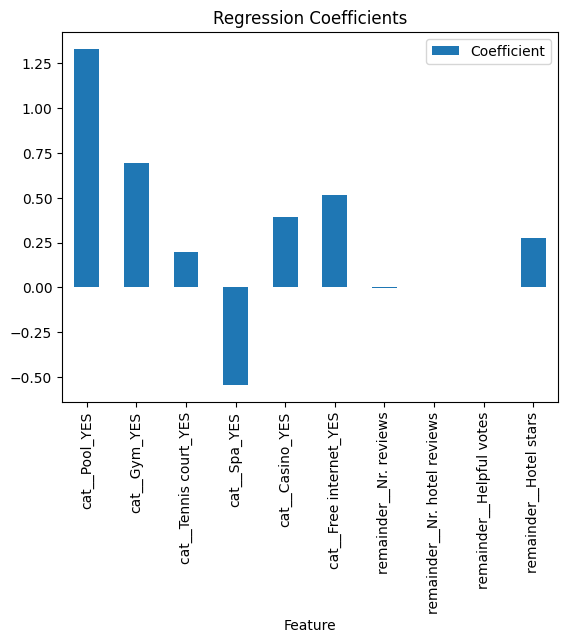

In [68]:
import matplotlib.pyplot as plt

coefficients_df.plot(kind='bar', x='Feature', y='Coefficient')
plt.title('Regression Coefficients')
plt.show()

In [17]:
!pip install pulp


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/17.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/17.7 MB ? eta -:--:--
    --------------------------------------- 0.3/17.7 MB ? eta -:--:--
   - -------------------------------------- 0.5/17.7 MB 1.3 MB/s eta 0:00:14
   - -------------------------------------- 0.8/17.7 MB 1.2 MB/s eta 0:00:15
   -- ------------------------------------- 1.0/17.7 MB 1.3 MB/s eta 0:00:14
   --- ------------------------------------ 1.6/17.7 MB 1.3 MB/s eta 0:00:13
   ---- ----------------------------------- 1.8/17.7 MB 1.3 MB/s eta 0:00:13
   ---- ----------------------------------- 2.1/17.7 MB 1.3 MB/s eta 0:00:13
   ----- ---------------------------------- 2.4/17.7 MB 1.3 MB/s eta 0:00:13
   ----- ---------------------------------- 2.4/17.7 MB 1.3 MB/s eta 0:00:13
   ----- ---------------------------------- 2.6/17.7 MB 1.2 MB/s eta 0:00:13
   ------ --------------------------------- 2.9/17.7 MB 1.2 MB/s eta 0:00:12
   ------- --------

In [4]:
# menampilkan angka gradien dan intercept
from sklearn.linear_model import LinearRegression
import pandas as pd

# List of all x variables to calculate gradients
x_vars = ['Pool_YES', 'Gym_YES', 'Tennis court_YES', 'Spa_YES', 'Casino_YES',
          'Free internet_YES', 'Traveler type_Couples', 'Traveler type_Families',
          'Traveler type_Friends', 'Traveler type_Solo']

# Dictionary to store gradients and intercepts
gradients = {}

# Loop through all x variables
for var in x_vars:
    x = df_encoded[[var]].values  # Independent variable
    y = df_encoded['Score'].values  # Dependent variable

    # Create and fit the linear regression model
    model = LinearRegression()
    model.fit(x, y)

    # Store the gradient and intercept
    gradients[var] = {
        "Gradient": model.coef_[0],
        "Intercept": model.intercept_
    }

# Convert the dictionary to a DataFrame for better visualization
gradients_df = pd.DataFrame(gradients).T
gradients_df.reset_index(inplace=True)
gradients_df.rename(columns={"index": "Variable"}, inplace=True)

# Save the result to an Excel file
file_path = "gradients_and_intercepts.xlsx"
gradients_df.to_excel(file_path, index=False)

# Display the DataFrame and provide download link
print("Calculation Complete!")
print(gradients_df)

file_path  # File path for download

Calculation Complete!
                 Variable  Gradient  Intercept
0                Pool_YES  0.960417   3.208333
1                 Gym_YES  0.041667   4.083333
2        Tennis court_YES  0.155729   4.085938
3                 Spa_YES  0.117708   4.033333
4              Casino_YES -0.048246   4.166667
5       Free internet_YES  0.872917   3.291667
6   Traveler type_Couples  0.192266   4.041379
7  Traveler type_Families -0.134102   4.152284
8   Traveler type_Friends  0.158941   4.097156
9      Traveler type_Solo -0.216667   4.133333


'gradients_and_intercepts.xlsx'

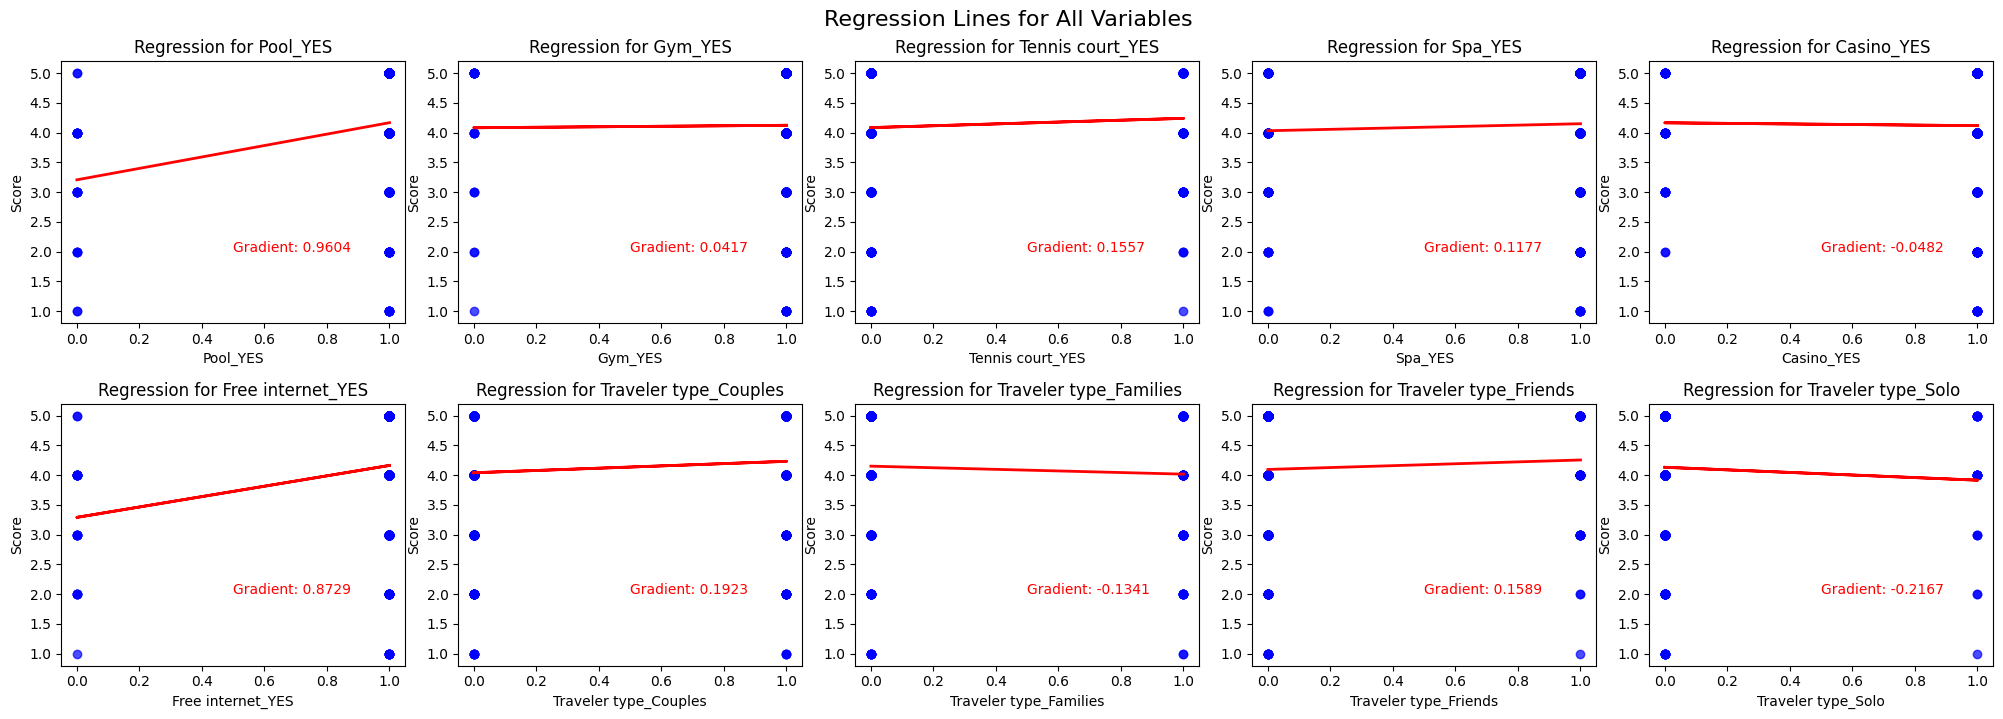

In [5]:
# menggabungkan gambar dan angka gradien & intercept
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# List of all x variables
x_vars = ['Pool_YES', 'Gym_YES', 'Tennis court_YES', 'Spa_YES', 'Casino_YES',
          'Free internet_YES', 'Traveler type_Couples', 'Traveler type_Families',
          'Traveler type_Friends', 'Traveler type_Solo']

# Set up the plot grid
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 7))  # 2 rows, 5 columns
axes = axes.flatten()  # Flatten axes for easier indexing

# Loop through each variable and plot
for i, var in enumerate(x_vars):
    x = df_encoded[[var]].values  # Independent variable
    y = df_encoded['Score'].values  # Dependent variable

    # Create and fit the linear regression model
    model = LinearRegression()
    model.fit(x, y)
    gradient = model.coef_[0]  # Get the gradient

    # Plot scatter and regression line
    axes[i].scatter(x, y, color='blue', alpha=0.7)
    axes[i].plot(x, model.predict(x), color='red', linewidth=2)

    # Add gradient annotation
    axes[i].annotate(f"Gradient: {gradient:.4f}", xy=(0.5, max(y) - 3), color="red", fontsize=10)

    # Set titles and labels
    axes[i].set_title(f"Regression for {var}")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Score")

# Adjust layout
plt.tight_layout()
plt.suptitle("Regression Lines for All Variables", y=1.02, fontsize=16)
plt.show()

In [ ]:
# dua fungsi maksimal R
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Reload the dataset
file_path = 'lasvegastrip.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Select relevant columns
columns_to_use = ['Pool', 'Gym', 'Tennis court', 'Spa', 'Casino', 'Free internet',
                  'Traveler type', 'Score']
df_clean = df.dropna(subset=columns_to_use)

# Convert categorical columns 'YES'/'NO' to numeric 1/0
categorical_columns = ['Pool', 'Gym', 'Tennis court', 'Spa', 'Casino', 'Free internet']
df_clean[categorical_columns] = df_clean[categorical_columns].replace({'YES': 1, 'NO': 0})

# OneHotEncode traveler type
encoder = OneHotEncoder(sparse_output=False, drop='first')  # Compatible with sklearn 1.5.2
traveler_encoded = encoder.fit_transform(df_clean[['Traveler type']])
traveler_columns = encoder.get_feature_names_out(['Traveler type'])

# Define features and target
facility_features = df_clean[categorical_columns].values  # Features for R1
traveler_features = traveler_encoded                     # Features for R2
y = df_clean['Score'].values                              # Target variable

# Train-test split for R1 (Facilities)
X_train_R1, X_test_R1, y_train_R1, y_test_R1 = train_test_split(facility_features, y, test_size=0.3, random_state=42)

# Train-test split for R2 (Traveler Types)
X_train_R2, X_test_R2, y_train_R2, y_test_R2 = train_test_split(traveler_features, y, test_size=0.3, random_state=42)

# Train Random Forest Regressor for R1
model_R1 = RandomForestRegressor(random_state=42)
model_R1.fit(X_train_R1, y_train_R1)
feature_importances_R1 = model_R1.feature_importances_

# Train Random Forest Regressor for R2
model_R2 = RandomForestRegressor(random_state=42)
model_R2.fit(X_train_R2, y_train_R2)
feature_importances_R2 = model_R2.feature_importances_

# Map feature importance to feature names for R1 and R2
importance_map_R1 = dict(zip(categorical_columns, feature_importances_R1))
importance_map_R2 = dict(zip(traveler_columns, feature_importances_R2))

# Sort and display feature importance for R1 and R2
sorted_importance_R1 = sorted(importance_map_R1.items(), key=lambda x: x[1], reverse=True)
sorted_importance_R2 = sorted(importance_map_R2.items(), key=lambda x: x[1], reverse=True)

# Convert to DataFrame for better visualization
importance_df_R1 = pd.DataFrame(sorted_importance_R1, columns=['Feature', 'Importance'])
importance_df_R2 = pd.DataFrame(sorted_importance_R2, columns=['Feature', 'Importance'])

# Save the results to an Excel file
output_path = 'feature_importance_analysis_split.xlsx'
with pd.ExcelWriter(output_path) as writer:
    importance_df_R1.to_excel(writer, sheet_name='R1_Facilities', index=False)
    importance_df_R2.to_excel(writer, sheet_name='R2_Traveler_Types', index=False)

# Display the DataFrames
print("Feature Importance Analysis for R1 (Facilities):")
print(importance_df_R1)
print("\nFeature Importance Analysis for R2 (Traveler Types):")
print(importance_df_R2)

C:\Users\a409i\AppData\Local\Temp\ipykernel_11628\1724459063.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean[categorical_columns] = df_clean[categorical_columns].replace({'YES': 1, 'NO': 0})


Feature Importance Analysis for R1 (Facilities):
         Feature  Importance
0           Pool    0.533944
1  Free internet    0.254390
2   Tennis court    0.067187
3         Casino    0.052313
4            Spa    0.046830
5            Gym    0.045336

Feature Importance Analysis for R2 (Traveler Types):
                  Feature  Importance
0   Traveler type_Couples    0.373875
1  Traveler type_Families    0.256379
2   Traveler type_Friends    0.217503
3      Traveler type_Solo    0.152242


In [106]:
# Prediksi nilai Score untuk fasilitas (R1) dan traveler type (R2)
y_pred_R1 = model_R1.predict(facility_features)
y_pred_R2 = model_R2.predict(traveler_features)

# Membuat DataFrame hasil prediksi untuk R1
df_pred_R1 = pd.DataFrame(facility_features, columns=categorical_columns)
df_pred_R1['Actual_Score'] = y
df_pred_R1['Predicted_Score_R1'] = y_pred_R1

# Membuat DataFrame hasil prediksi untuk R2
df_pred_R2 = pd.DataFrame(traveler_features, columns=traveler_columns)
df_pred_R2['Actual_Score'] = y
df_pred_R2['Predicted_Score_R2'] = y_pred_R2

# Menampilkan hasil prediksi dalam bentuk DataFrame
print("Predicted Scores for R1 (Facilities):")
print(df_pred_R1.head())

print("\nPredicted Scores for R2 (Traveler Types):")
print(df_pred_R2.head())

# Jika ingin menyimpan hasil ke file Excel
with pd.ExcelWriter("predicted_scores_output.xlsx") as writer:
    df_pred_R1.to_excel(writer, sheet_name="Predicted_R1", index=False)
    df_pred_R2.to_excel(writer, sheet_name="Predicted_R2", index=False)

Predicted Scores for R1 (Facilities):
   Pool  Gym  Tennis court  Spa  Casino  Free internet  Actual_Score  \
0     0    1             0    0       1              1             5   
1     0    1             0    0       1              1             3   
2     0    1             0    0       1              1             5   
3     0    1             0    0       1              1             4   
4     0    1             0    0       1              1             4   

   Predicted_Score_R1  
0            2.995178  
1            2.995178  
2            2.995178  
3            2.995178  
4            2.995178  

Predicted Scores for R2 (Traveler Types):
   Traveler type_Couples  Traveler type_Families  Traveler type_Friends  \
0                    0.0                     0.0                    1.0   
1                    0.0                     0.0                    0.0   
2                    0.0                     1.0                    0.0   
3                    0.0                  

In [107]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred_train = model_R1.predict(X_train_R1)
y_pred_test = model_R1.predict(X_test_R1)

print("Train R² Score:", r2_score(y_train_R1, y_pred_train))
print("Test R² Score:", r2_score(y_test_R1, y_pred_test))
print("Test MSE:", mean_squared_error(y_test_R1, y_pred_test))

Train R² Score: 0.0790921108679492
Test R² Score: 0.0920906886383055
Test MSE: 0.9280291852976876


In [ ]:
# mencari nilai maksimasi dua fungsi objektif
# hasil fungsi R ditambah R = R1 + R2
from pulp import LpMaximize, LpProblem, LpVariable, lpSum

# Feature Importance (weights) for R1 (Facilities) and R2 (Traveler Types)
R1_features = {
    "Pool": 0.264178,
    "Free internet": 0.133069,
    "Tennis court": 0.084067,
    "Gym": 0.077838,
    "Casino": 0.057803,
    "Spa": 0.052160
}

R2_features = {
    "Traveler type: Families": 0.115391,
    "Traveler type: Couples": 0.101020,
    "Traveler type: Friends": 0.070422,
    "Traveler type: Solo": 0.044052
}

# Create the optimization problem
problem = LpProblem("Maximize_R", LpMaximize)

# Define decision variables (binary) for R1 and R2
decision_vars_R1 = {feature: LpVariable(feature.replace(" ", "_").replace(":", ""), 0, 1, cat="Binary") for feature in R1_features}
decision_vars_R2 = {feature: LpVariable(feature.replace(" ", "_").replace(":", ""), 0, 1, cat="Binary") for feature in R2_features}

# Objective function: Maximize R = R1 + R2
problem += (
    lpSum(R1_features[feature] * decision_vars_R1[feature] for feature in R1_features) + 
    lpSum(R2_features[feature] * decision_vars_R2[feature] for feature in R2_features)
), "Objective_Function"

# Constraints for R1 (Facilities): Max 5 facilities can be chosen
problem += lpSum(decision_vars_R1[feature] for feature in R1_features) <= 4, "Facility_Constraint"

# Constraints for R2 (Traveler Types): Exactly 1 traveler type must be chosen
problem += lpSum(decision_vars_R2[feature] for feature in R2_features) == 1, "Traveler_Type_Constraint"

# Solve the optimization problem
problem.solve()

# Extract results for R1 and R2
optimal_decisions_R1 = {feature: decision_vars_R1[feature].varValue for feature in R1_features}
optimal_decisions_R2 = {feature: decision_vars_R2[feature].varValue for feature in R2_features}

# Calculate R1, R2, and total R
R1_score = sum(R1_features[feature] * optimal_decisions_R1[feature] for feature in R1_features)
R2_score = sum(R2_features[feature] * optimal_decisions_R2[feature] for feature in R2_features)
total_score = R1_score + R2_score

# Print results
print("Optimal Decision Variables for R1 (Facilities):")
for feature, value in optimal_decisions_R1.items():
    print(f"{feature}: {value}")

print("\nOptimal Decision Variables for R2 (Traveler Types):")
for feature, value in optimal_decisions_R2.items():
    print(f"{feature}: {value}")

print(f"\nR1 Score: {R1_score}")
print(f"R2 Score: {R2_score}")
print(f"Total R Score (R = R1 + R2): {total_score}")

Optimal Decision Variables for R1 (Facilities):
Pool: 1.0
Free internet: 1.0
Tennis court: 1.0
Gym: 1.0
Casino: 0.0
Spa: 0.0

Optimal Decision Variables for R2 (Traveler Types):
Traveler type: Families: 1.0
Traveler type: Couples: 0.0
Traveler type: Friends: 0.0
Traveler type: Solo: 0.0

R1 Score: 0.559152
R2 Score: 0.115391
Total R Score (R = R1 + R2): 0.674543


Benchmark Results:
   max_facilities  max_travelers  R1_score  R2_score  total_score  \
0               1              1  0.264178  0.115391     0.379569   
1               2              1  0.397247  0.115391     0.512638   
2               3              1  0.481314  0.115391     0.596705   
3               4              1  0.559152  0.115391     0.674543   
4               5              1  0.616955  0.115391     0.732346   

                                optimal_decisions_R1  \
0  {'Pool': 1.0, 'Free internet': 0.0, 'Tennis co...   
1  {'Pool': 1.0, 'Free internet': 1.0, 'Tennis co...   
2  {'Pool': 1.0, 'Free internet': 1.0, 'Tennis co...   
3  {'Pool': 1.0, 'Free internet': 1.0, 'Tennis co...   
4  {'Pool': 1.0, 'Free internet': 1.0, 'Tennis co...   

                                optimal_decisions_R2  Efficiency_R1  \
0  {'Traveler type: Families': 1.0, 'Traveler typ...      39.481703   
1  {'Traveler type: Families': 1.0, 'Traveler typ...      59.369017   
2  {'Traveler ty

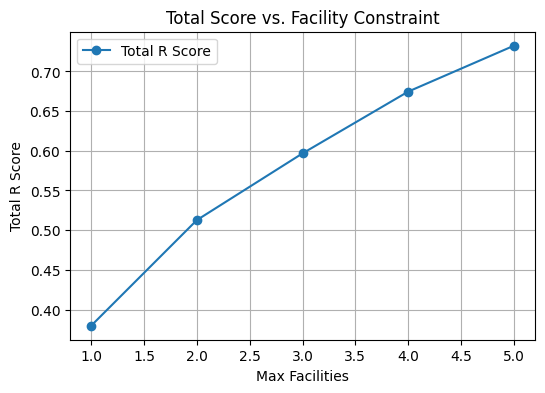

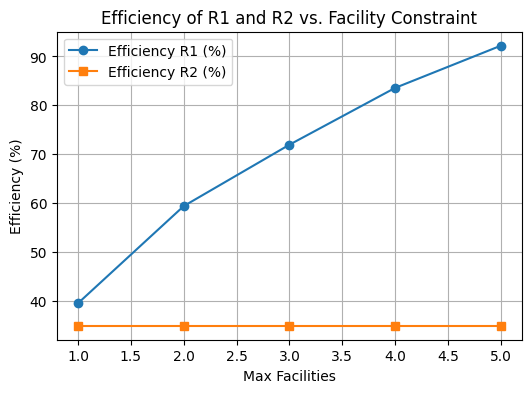

In [ ]:
from pulp import LpMaximize, LpProblem, LpVariable, lpSum
import pandas as pd
import matplotlib.pyplot as plt

# Feature Importance (weights) for R1 (Facilities) and R2 (Traveler Types)
R1_features = {
    "Pool": 0.264178,
    "Free internet": 0.133069,
    "Tennis court": 0.084067,
    "Gym": 0.077838,
    "Casino": 0.057803,
    "Spa": 0.052160
}

R2_features = {
    "Traveler type: Families": 0.115391,
    "Traveler type: Couples": 0.101020,
    "Traveler type: Friends": 0.070422,
    "Traveler type: Solo": 0.044052
}

def solve_optimization(max_facilities, max_travelers):
    # Create the optimization problem
    problem = LpProblem("Maximize_R", LpMaximize)

    # Define decision variables (binary) for R1 and R2
    decision_vars_R1 = {feature: LpVariable(feature.replace(" ", "_").replace(":", ""), 0, 1, cat="Binary") for feature in R1_features}
    decision_vars_R2 = {feature: LpVariable(feature.replace(" ", "_").replace(":", ""), 0, 1, cat="Binary") for feature in R2_features}

    # Objective function: Maximize R = R1 + R2
    problem += (
        lpSum(R1_features[feature] * decision_vars_R1[feature] for feature in R1_features) + 
        lpSum(R2_features[feature] * decision_vars_R2[feature] for feature in R2_features)
    ), "Objective_Function"

    # Constraints for R1 (Facilities)
    problem += lpSum(decision_vars_R1[feature] for feature in R1_features) <= max_facilities, "Facility_Constraint"

    # Constraints for R2 (Traveler Types)
    problem += lpSum(decision_vars_R2[feature] for feature in R2_features) == max_travelers, "Traveler_Type_Constraint"

    # Solve the optimization problem
    problem.solve()

    # Extract results for R1 and R2
    optimal_decisions_R1 = {feature: decision_vars_R1[feature].varValue for feature in R1_features}
    optimal_decisions_R2 = {feature: decision_vars_R2[feature].varValue for feature in R2_features}

    # Calculate R1, R2, and total R
    R1_score = sum(R1_features[feature] * optimal_decisions_R1[feature] for feature in R1_features)
    R2_score = sum(R2_features[feature] * optimal_decisions_R2[feature] for feature in R2_features)
    total_score = R1_score + R2_score

    return {
        "max_facilities": max_facilities,
        "max_travelers": max_travelers,
        "R1_score": R1_score,
        "R2_score": R2_score,
        "total_score": total_score,
        "optimal_decisions_R1": optimal_decisions_R1,
        "optimal_decisions_R2": optimal_decisions_R2
    }

# Benchmark: Vary constraints and collect results
benchmark_results = []
for max_facilities in range(1, 6):  # Test facility constraints from 3 to 5
    for max_travelers in range(1, 2):  # Test traveler type constraints (fixed to 1 for simplicity)
        result = solve_optimization(max_facilities, max_travelers)
        benchmark_results.append(result)

# Create a DataFrame for analysis
benchmark_df = pd.DataFrame(benchmark_results)

# Add efficiency columns
benchmark_df["Efficiency_R1"] = benchmark_df["R1_score"] / sum(R1_features.values()) * 100
benchmark_df["Efficiency_R2"] = benchmark_df["R2_score"] / sum(R2_features.values()) * 100

# Display benchmark results
print("Benchmark Results:")
print(benchmark_df)

# Save results to CSV (if needed)
benchmark_df.to_csv("optimization_benchmark_results.csv", index=False)
print("\nData benchmark telah disimpan ke file 'optimization_benchmark_results.csv'")

# Visualization: Total R Score vs. Facility Constraint
plt.figure(figsize=(6, 4))
plt.plot(benchmark_df["max_facilities"], benchmark_df["total_score"], marker='o', label="Total R Score")
plt.title("Total Score vs. Facility Constraint")
plt.xlabel("Max Facilities")
plt.ylabel("Total R Score")
plt.legend()
plt.grid()
plt.show()

# Visualization: Efficiency of R1 and R2 vs. Facility Constraint
plt.figure(figsize=(6, 4))

# Plot Efficiency R1
plt.plot(benchmark_df["max_facilities"], benchmark_df["Efficiency_R1"], marker='o', label="Efficiency R1 (%)")

# Plot Efficiency R2
plt.plot(benchmark_df["max_facilities"], benchmark_df["Efficiency_R2"], marker='s', label="Efficiency R2 (%)")

plt.title("Efficiency of R1 and R2 vs. Facility Constraint")
plt.xlabel("Max Facilities")
plt.ylabel("Efficiency (%)")
plt.legend()
plt.grid()
plt.show()


Benchmark Results:
    Max Facilities  Max Travelers  R1 Score  R2 Score  Total Score  \
0                1              1  0.264178  0.115391     0.379569   
1                1              2  0.264178  0.216411     0.480589   
2                1              3  0.264178  0.286833     0.551011   
3                1              4  0.264178  0.330885     0.595063   
4                2              1  0.397247  0.115391     0.512638   
5                2              2  0.397247  0.216411     0.613658   
6                2              3  0.397247  0.286833     0.684080   
7                2              4  0.397247  0.330885     0.728132   
8                3              1  0.481314  0.115391     0.596705   
9                3              2  0.481314  0.216411     0.697725   
10               3              3  0.481314  0.286833     0.768147   
11               3              4  0.481314  0.330885     0.812199   
12               4              1  0.559152  0.115391     0.674543   


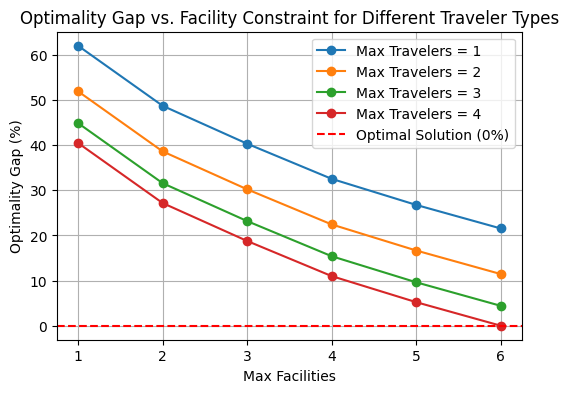

In [98]:
import time
from pulp import LpMaximize, LpProblem, LpVariable, lpSum
import pandas as pd
import matplotlib.pyplot as plt

# Feature Importance (weights) for R1 (Facilities) and R2 (Traveler Types)
R1_features = {
    "Pool": 0.264178, "Free internet": 0.133069, "Tennis court": 0.084067,
    "Gym": 0.077838, "Casino": 0.057803, "Spa": 0.052160
}

R2_features = {
    "Traveler type: Families": 0.115391, "Traveler type: Couples": 0.101020,
    "Traveler type: Friends": 0.070422, "Traveler type: Solo": 0.044052
}

def solve_and_benchmark(max_facilities, max_travelers):
    start_time = time.time()  # Start timer

    # Create the optimization problem
    problem = LpProblem("Maximize_R", LpMaximize)

    # Decision variables
    decision_vars_R1 = {f: LpVariable(f.replace(" ", "_").replace(":", ""), 0, 1, cat="Binary") for f in R1_features}
    decision_vars_R2 = {f: LpVariable(f.replace(" ", "_").replace(":", ""), 0, 1, cat="Binary") for f in R2_features}

    # Objective function
    problem += lpSum(R1_features[f] * decision_vars_R1[f] for f in R1_features) + lpSum(R2_features[f] * decision_vars_R2[f] for f in R2_features)

    # Constraints
    problem += lpSum(decision_vars_R1[f] for f in R1_features) <= max_facilities
    problem += lpSum(decision_vars_R2[f] for f in R2_features) == max_travelers

    # Solve the problem
    problem.solve()

    runtime = time.time() - start_time  # End timer

    # Results
    R1_score = sum(R1_features[f] * decision_vars_R1[f].varValue for f in R1_features)
    R2_score = sum(R2_features[f] * decision_vars_R2[f].varValue for f in R2_features)
    total_score = R1_score + R2_score
    max_R1 = sum(R1_features.values())
    max_R2 = sum(R2_features.values())

    # Optimality gap
    gap = ((max_R1 + max_R2) - total_score) / (max_R1 + max_R2) * 100

    return {
        "Max Facilities": max_facilities,
        "Max Travelers": max_travelers,
        "R1 Score": R1_score,
        "R2 Score": R2_score,
        "Total Score": total_score,
        "Optimality Gap (%)": gap,
        "Runtime (s)": runtime
    }

# Run benchmark
results = []
for max_facilities in range(1, 7):  # Facilities: 1 to 4
    for max_travelers in range(1, 5):  # Travelers: 1 to 4
        result = solve_and_benchmark(max_facilities, max_travelers)
        results.append(result)

# Convert to DataFrame
benchmark_df = pd.DataFrame(results)

# Display results
print("\nBenchmark Results:")
print(benchmark_df)

# Save to CSV
benchmark_df.to_csv("benchmark_results_with_travelers.csv", index=False)
print("\nBenchmark results saved to 'benchmark_results_with_travelers.csv'")

# Plot Optimality Gap vs Max Facilities for each Max Travelers
plt.figure(figsize=(6, 4))

for max_travelers in range(1, 5):
    subset = benchmark_df[benchmark_df["Max Travelers"] == max_travelers]
    plt.plot(subset["Max Facilities"], subset["Optimality Gap (%)"], marker='o', linestyle='-', label=f"Max Travelers = {max_travelers}")

# Tambahkan informasi grafik
plt.title("Optimality Gap vs. Facility Constraint for Different Traveler Types")
plt.xlabel("Max Facilities")
plt.ylabel("Optimality Gap (%)")
plt.axhline(0, color="red", linestyle="--", label="Optimal Solution (0%)")
plt.legend()
plt.grid()
plt.show()